# Chapter 12 in-chapter exercises

In [1]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# import module from scipy (for cosine similarity)
from scipy import spatial


In [2]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 12.1: Example of scatter plot showing correlated data

In [3]:
# number of sibling pairs
num_pairs = 40

# simulate ratings for brothers
brothers_ratings = np.random.randint(1,11,num_pairs)

# simulate correlated ratings for sisters based on brothers' ratings
noise = np.random.normal(0,2,num_pairs)  # random noise
sisters_ratings = brothers_ratings + noise  # sister's ratings are brother's ratings plus some noise

# make sure ratings are within bounds 1 and 10
sisters_ratings = np.clip(np.round(sisters_ratings),1,10)

# correlation
r = stats.pearsonr(brothers_ratings,sisters_ratings)[0]

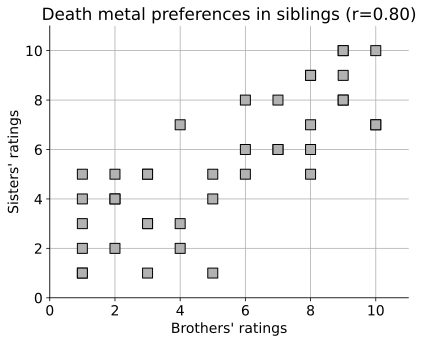

In [4]:
# scatter plot
plt.figure(figsize=(6,5))
plt.plot(brothers_ratings, sisters_ratings,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
plt.title(f'Death metal preferences in siblings (r={r:.2f})',loc='center')
plt.xlabel("Brothers' ratings")
plt.ylabel("Sisters' ratings")
plt.xlim(0,11)
plt.ylim(0,11)
plt.grid(True)

plt.tight_layout()
plt.show()